<img src='./img/logoline_12000.png' align='right' width='100%'></img>

<br>

# Seasonal forecast anomalies

### About

This notebook provides you a practical introduction to se


The notebook has the following outline:

* [1 - Calculate seasonal hindcast climate mean](#hindcast_climate_mean)
* [2 - Load monthly seasonal forecast data for September 2021](#seasonal_forecast_load)
* [3 - Calculate seasonal forecast anomalies for September 2021](#seasonal_anomalies_calculate)
* [4 - Compare the calculated anomalies with the seasonal forecast anomalies offered by the CDS](#seasonal_anomalies_compare)

### Data

This notebook introduces you to the `seasonal forecast monthly statistics` and `seasonal forecast anomalies` on single levels. The data used in the notebook has the following specifications:

> **Data**: `Seasonal forecast monthly statistics on single levels - Hindcast data` <br>
> **Temporal coverage**: `Sep 1993 to Sep 2016` <br>
> **Spatial coverage**: `Global` <br>
> **Format**: `GRIB`<br>
> **Retrieve requests**: 
> * [CDS API request - Hindcast individual members](./100_climate_data_store_intro.ipynb#seas5_monthly_hindcast)
> * [CDS API request - Hindcast climate mean](./100_climate_data_store_intro.ipynb#seas5_monthly_hindcast_mean)

<br>

> **Data**: `Seasonal forecast monthly statistics on single levels - Forecast data` <br>
> **Temporal coverage**: `Sep 2021` <br>
> **Spatial coverage**: `Global` <br>
> **Format**: `GRIB`<br>
> **Retrieve request**: [CDS API request](./100_climate_data_store_intro.ipynb#seas5_monthly_forecast)

<br>

> **Data**: `Seasonal forecast anomalies on single levels` <br>
> **Temporal coverage**: `Sep 2021` <br>
> **Spatial coverage**: `Global` <br>
> **Format**: `GRIB`<br>
> **Retrieve request**: [CDS API request](./100_climate_data_store_intro.ipynb#seas5_monthly_anomalies)

<br>

Get [here](./101_c3s_data_intro.ipynb#seasonal_forecasts) more information about seasonal forecast data in general including an overview of the different dataset types.

### Further resources

<br>

<hr>

### Load libraries

In [1]:
# CDS API
import cdsapi

import cfgrib
# Libraries for working with multi-dimensional arrays
import numpy as np
import xarray as xr
import pandas as pd



# Libraries for plotting and visualising data
import matplotlib.path as mpath
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature

### Load helper functions

In [2]:
%run ./functions.ipynb

<hr>

## <a id='hindcast_climate mean'></a>1. Calculate seasonal hindcast climate mean

The example below will show you how to calculate seasonal forecast anomalies of total precipitation for September 2021 and for five subsequent months until February 2022. 
The term anomaly refers to the deviation of a value from the long-term average. A positive anomaly indicates that the average temperature of this particular year was warmer than the reference value, while a negative anomaly indicates that the average temperature for this year was cooler than the reference value.

The first step is to calculate the seasonal

In [6]:
ds = xr.open_dataset('./data/ecmwf_seas5_1993-2016_09_hindcast_monthly_tp.grib', engine='cfgrib')
ds

<xarray.Dataset>
Dimensions:     (number: 25, time: 24, step: 7, latitude: 181, longitude: 360)
Coordinates:
  * number      (number) int64 0 1 2 3 4 5 6 7 8 ... 16 17 18 19 20 21 22 23 24
  * time        (time) datetime64[ns] 1993-09-01 1994-09-01 ... 2016-09-01
  * step        (step) timedelta64[ns] 30 days 61 days ... 181 days 182 days
    surface     float64 ...
  * latitude    (latitude) float64 90.0 89.0 88.0 87.0 ... -88.0 -89.0 -90.0
  * longitude   (longitude) float64 0.0 1.0 2.0 3.0 ... 356.0 357.0 358.0 359.0
    valid_time  (time, step) datetime64[ns] ...
Data variables:
    tprate      (number, time, step, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2021-10-12T10:14 GRIB to CDM+CF via cfgrib-0.9.9...

In [12]:
ds_hindcast = xr.open_dataset('./data/ecmwf_seas5_1993-2016_09_hindcast_monthly_tp.grib', engine='cfgrib', backend_kwargs=dict(time_dims=('forecastMonth', 'time')))
ds_hindcast

<xarray.Dataset>
Dimensions:        (number: 25, forecastMonth: 6, time: 24, latitude: 181, longitude: 360)
Coordinates:
  * number         (number) int64 0 1 2 3 4 5 6 7 8 ... 17 18 19 20 21 22 23 24
  * forecastMonth  (forecastMonth) int64 1 2 3 4 5 6
  * time           (time) datetime64[ns] 1993-09-01 1994-09-01 ... 2016-09-01
    surface        float64 ...
  * latitude       (latitude) float64 90.0 89.0 88.0 87.0 ... -88.0 -89.0 -90.0
  * longitude      (longitude) float64 0.0 1.0 2.0 3.0 ... 357.0 358.0 359.0
Data variables:
    tprate         (number, forecastMonth, time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2021-10-12T10:18 GRIB to CDM+CF via cfgrib-0.9.9...

In [13]:
tprate_hindcast = ds_hindcast['tprate']
tprate_hindcast

<xarray.DataArray 'tprate' (number: 25, forecastMonth: 6, time: 24, latitude: 181, longitude: 360)>
[234576000 values with dtype=float32]
Coordinates:
  * number         (number) int64 0 1 2 3 4 5 6 7 8 ... 17 18 19 20 21 22 23 24
  * forecastMonth  (forecastMonth) int64 1 2 3 4 5 6
  * time           (time) datetime64[ns] 1993-09-01 1994-09-01 ... 2016-09-01
    surface        float64 0.0
  * latitude       (latitude) float64 90.0 89.0 88.0 87.0 ... -88.0 -89.0 -90.0
  * longitude      (longitude) float64 0.0 1.0 2.0 3.0 ... 357.0 358.0 359.0
Attributes: (12/30)
    GRIB_paramId:                             172228
    GRIB_dataType:                            fcmean
    GRIB_numberOfPoints:                      65160
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_shortName:                           tprate
    GRIB_totalNumber:                         0
    GRIB_units:                               m s**-1
    long_name:                                Total precipitation
    units:                                    m s**-1
    standard_name:                            unknown

Create average over ensemble members

In [25]:
tprate_hindcast_mean = tprate_hindcast.mean(['number', 'time'])
tprate_hindcast_mean

<xarray.DataArray 'tprate' (forecastMonth: 6, latitude: 181, longitude: 360)>
array([[[1.30519284e-08, 1.30519284e-08, 1.30519284e-08, ...,
         1.30519284e-08, 1.30519284e-08, 1.30519284e-08],
        [1.29193847e-08, 1.29264786e-08, 1.29335120e-08, ...,
         1.28761171e-08, 1.28908137e-08, 1.29050388e-08],
        [1.27145787e-08, 1.27424329e-08, 1.27702879e-08, ...,
         1.26161463e-08, 1.26491306e-08, 1.26819577e-08],
        ...,
        [1.59635727e-09, 1.58900848e-09, 1.58193869e-09, ...,
         1.61743330e-09, 1.61039981e-09, 1.60347557e-09],
        [2.02993156e-09, 2.02502037e-09, 2.02016959e-09, ...,
         2.04188844e-09, 2.03753481e-09, 2.03377559e-09],
        [2.38863618e-09, 2.38863618e-09, 2.38863618e-09, ...,
         2.38863618e-09, 2.38863618e-09, 2.38863618e-09]],

       [[9.31883282e-09, 9.31883282e-09, 9.31883282e-09, ...,
         9.31883282e-09, 9.31883282e-09, 9.31883282e-09],
        [9.47422318e-09, 9.47830969e-09, 9.48284473e-09, ...,
         9.45015177e-09, 9.45828837e-09, 9.46614698e-09],
        [9.54022727e-09, 9.55950874e-09, 9.57912949e-09, ...,
         9.45883460e-09, 9.48605816e-09, 9.51313694e-09],
...
        [9.28015720e-10, 9.25384325e-10, 9.22122267e-10, ...,
         9.37474542e-10, 9.35328148e-10, 9.31981159e-10],
        [1.12467280e-09, 1.12765597e-09, 1.12905052e-09, ...,
         1.12102272e-09, 1.12257492e-09, 1.12303578e-09],
        [1.43433732e-09, 1.43433732e-09, 1.43433732e-09, ...,
         1.43433732e-09, 1.43433732e-09, 1.43433732e-09]],

       [[4.48322357e-09, 4.48322357e-09, 4.48322357e-09, ...,
         4.48322357e-09, 4.48322357e-09, 4.48322357e-09],
        [4.71520556e-09, 4.71795225e-09, 4.71878270e-09, ...,
         4.71338035e-09, 4.71536943e-09, 4.71564832e-09],
        [4.97592767e-09, 4.99264408e-09, 5.00930586e-09, ...,
         4.93878982e-09, 4.95157160e-09, 4.96347985e-09],
        ...,
        [1.52525936e-09, 1.52063917e-09, 1.51525492e-09, ...,
         1.54213353e-09, 1.53621571e-09, 1.52983115e-09],
        [1.83119542e-09, 1.82910354e-09, 1.82867910e-09, ...,
         1.83600357e-09, 1.83390569e-09, 1.83308713e-09],
        [2.18982832e-09, 2.18982832e-09, 2.18982832e-09, ...,
         2.18982832e-09, 2.18982832e-09, 2.18982832e-09]]], dtype=float32)
Coordinates:
  * forecastMonth  (forecastMonth) int64 1 2 3 4 5 6
    surface        float64 0.0
  * latitude       (latitude) float64 90.0 89.0 88.0 87.0 ... -88.0 -89.0 -90.0
  * longitude      (longitude) float64 0.0 1.0 2.0 3.0 ... 357.0 358.0 359.0

<br>

## <a id='seasonal_forecast_load'></a>2. Load monthly seasonal forecast data for September 2021

In [29]:
seas5_forecast = xr.open_dataset('./data/ecmwf_seas5_2021_09_forecast_monthly_tp.grib', engine='cfgrib', backend_kwargs=dict(time_dims=('forecastMonth', 'time')))
seas5_forecast

<xarray.Dataset>
Dimensions:        (number: 51, forecastMonth: 6, latitude: 181, longitude: 360)
Coordinates:
  * number         (number) int64 0 1 2 3 4 5 6 7 8 ... 43 44 45 46 47 48 49 50
  * forecastMonth  (forecastMonth) int64 1 2 3 4 5 6
    time           datetime64[ns] ...
    surface        float64 ...
  * latitude       (latitude) float64 90.0 89.0 88.0 87.0 ... -88.0 -89.0 -90.0
  * longitude      (longitude) float64 0.0 1.0 2.0 3.0 ... 357.0 358.0 359.0
Data variables:
    tprate         (number, forecastMonth, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2021-10-12T13:53 GRIB to CDM+CF via cfgrib-0.9.9...

In [30]:
seas5_forecast_mean = seas5_forecast.mean(['number'])
seas5_forecast_mean

<xarray.Dataset>
Dimensions:        (forecastMonth: 6, latitude: 181, longitude: 360)
Coordinates:
  * forecastMonth  (forecastMonth) int64 1 2 3 4 5 6
    time           datetime64[ns] 2021-09-01
    surface        float64 0.0
  * latitude       (latitude) float64 90.0 89.0 88.0 87.0 ... -88.0 -89.0 -90.0
  * longitude      (longitude) float64 0.0 1.0 2.0 3.0 ... 357.0 358.0 359.0
Data variables:
    tprate         (forecastMonth, latitude, longitude) float32 1.225e-08 ......

## Calculate anomalies

In [31]:
seas5_anomalies_202109 = seas5_forecast_mean['tprate'] - tprate_hindcast_mean
seas5_anomalies_202109

<xarray.DataArray 'tprate' (forecastMonth: 6, latitude: 181, longitude: 360)>
array([[[-7.9992901e-10, -7.9992901e-10, -7.9992901e-10, ...,
         -7.9992901e-10, -7.9992901e-10, -7.9992901e-10],
        [-6.5896799e-10, -6.6634698e-10, -6.7623418e-10, ...,
         -6.4865624e-10, -6.5236794e-10, -6.5603523e-10],
        [-2.8438940e-10, -3.2579717e-10, -3.6934544e-10, ...,
         -1.9294788e-10, -2.2307933e-10, -2.5348079e-10],
        ...,
        [-2.0222668e-10, -1.9801660e-10, -1.9608282e-10, ...,
         -2.1217483e-10, -2.0899327e-10, -2.0606372e-10],
        [-2.8070579e-10, -2.8121583e-10, -2.8007441e-10, ...,
         -2.8353198e-10, -2.8217439e-10, -2.8112579e-10],
        [-3.2754288e-10, -3.2754288e-10, -3.2754288e-10, ...,
         -3.2754288e-10, -3.2754288e-10, -3.2754288e-10]],

       [[ 7.5276674e-10,  7.5276674e-10,  7.5276674e-10, ...,
          7.5276674e-10,  7.5276674e-10,  7.5276674e-10],
        [ 9.5589581e-10,  9.6051167e-10,  9.6610542e-10, ...,
          9.3174624e-10,  9.4158548e-10,  9.4827879e-10],
        [ 1.1448353e-09,  1.1597932e-09,  1.1751258e-09, ...,
          1.0804238e-09,  1.1032757e-09,  1.1229915e-09],
...
        [-3.9325376e-11, -4.4825921e-11, -4.3703874e-11, ...,
         -4.0794923e-11, -4.0360493e-11, -4.2006787e-11],
        [-4.5523585e-11, -4.9790727e-11, -4.8617332e-11, ...,
         -4.8436144e-11, -4.8989590e-11, -4.6169180e-11],
        [ 4.3848258e-11,  4.3848258e-11,  4.3848258e-11, ...,
          4.3848258e-11,  4.3848258e-11,  4.3848258e-11]],

       [[ 3.9743897e-10,  3.9743897e-10,  3.9743897e-10, ...,
          3.9743897e-10,  3.9743897e-10,  3.9743897e-10],
        [ 1.2094503e-10,  1.2447554e-10,  1.3120660e-10, ...,
          1.0522250e-10,  1.0922507e-10,  1.1322632e-10],
        [ 6.6803008e-11,  7.0345063e-11,  7.2943429e-11, ...,
          7.5407680e-11,  7.0329964e-11,  6.6981531e-11],
        ...,
        [-1.8359536e-11, -7.3193673e-12, -1.1493806e-11, ...,
         -1.2835288e-11, -1.2766677e-11, -1.7795321e-11],
        [ 1.4521717e-10,  1.5201684e-10,  1.4773349e-10, ...,
          1.5039547e-10,  1.5006818e-10,  1.4960266e-10],
        [ 2.4896396e-10,  2.4896396e-10,  2.4896396e-10, ...,
          2.4896396e-10,  2.4896396e-10,  2.4896396e-10]]], dtype=float32)
Coordinates:
  * forecastMonth  (forecastMonth) int64 1 2 3 4 5 6
    time           datetime64[ns] 2021-09-01
    surface        float64 0.0
  * latitude       (latitude) float64 90.0 89.0 88.0 87.0 ... -88.0 -89.0 -90.0
  * longitude      (longitude) float64 0.0 1.0 2.0 3.0 ... 357.0 358.0 359.0

In [64]:
seas5_anomalies_202109_tp = seas5_anomalies_202109 * 1000 * 1000
seas5_anomalies_202109_tp

<xarray.DataArray 'tprate' (forecastMonth: 6, latitude: 181, longitude: 360)>
array([[[-7.99929025e-04, -7.99929025e-04, -7.99929025e-04, ...,
         -7.99929025e-04, -7.99929025e-04, -7.99929025e-04],
        [-6.58967998e-04, -6.66346983e-04, -6.76234195e-04, ...,
         -6.48656220e-04, -6.52367948e-04, -6.56035263e-04],
        [-2.84389389e-04, -3.25797184e-04, -3.69345449e-04, ...,
         -1.92947875e-04, -2.23079332e-04, -2.53480772e-04],
        ...,
        [-2.02226685e-04, -1.98016613e-04, -1.96082823e-04, ...,
         -2.12174840e-04, -2.08993268e-04, -2.06063720e-04],
        [-2.80705804e-04, -2.81215820e-04, -2.80074397e-04, ...,
         -2.83531990e-04, -2.82174384e-04, -2.81125773e-04],
        [-3.27542890e-04, -3.27542890e-04, -3.27542890e-04, ...,
         -3.27542890e-04, -3.27542890e-04, -3.27542890e-04]],

       [[ 7.52766733e-04,  7.52766733e-04,  7.52766733e-04, ...,
          7.52766733e-04,  7.52766733e-04,  7.52766733e-04],
        [ 9.55895754e-04,  9.60511679e-04,  9.66105377e-04, ...,
          9.31746210e-04,  9.41585458e-04,  9.48278815e-04],
        [ 1.14483538e-03,  1.15979312e-03,  1.17512583e-03, ...,
          1.08042383e-03,  1.10327569e-03,  1.12299155e-03],
...
         -4.07949228e-05, -4.03604936e-05, -4.20067845e-05],
        [-4.55235859e-05, -4.97907276e-05, -4.86173303e-05, ...,
         -4.84361408e-05, -4.89895901e-05, -4.61691816e-05],
        [ 4.38482602e-05,  4.38482602e-05,  4.38482602e-05, ...,
          4.38482602e-05,  4.38482602e-05,  4.38482602e-05]],

       [[ 3.97438969e-04,  3.97438969e-04,  3.97438969e-04, ...,
          3.97438969e-04,  3.97438969e-04,  3.97438969e-04],
        [ 1.20945035e-04,  1.24475555e-04,  1.31206602e-04, ...,
          1.05222498e-04,  1.09225068e-04,  1.13226321e-04],
        [ 6.68030116e-05,  7.03450642e-05,  7.29434323e-05, ...,
          7.54076827e-05,  7.03299593e-05,  6.69815272e-05],
        ...,
        [-1.83595366e-05, -7.31936734e-06, -1.14938057e-05, ...,
         -1.28352885e-05, -1.27666763e-05, -1.77953207e-05],
        [ 1.45217171e-04,  1.52016844e-04,  1.47733488e-04, ...,
          1.50395485e-04,  1.50068168e-04,  1.49602667e-04],
        [ 2.48963974e-04,  2.48963974e-04,  2.48963974e-04, ...,
          2.48963974e-04,  2.48963974e-04,  2.48963974e-04]]],
      dtype=float32)
Coordinates:
  * forecastMonth  (forecastMonth) int64 1 2 3 4 5 6
    time           datetime64[ns] 2021-09-01
    surface        float64 0.0
  * latitude       (latitude) float64 90.0 89.0 88.0 87.0 ... -88.0 -89.0 -90.0
  * longitude      (longitude) float64 0.0 1.0 2.0 3.0 ... 357.0 358.0 359.0

In [69]:
seas5_anomalies_202109_tp.longitude.data

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

In [67]:
seas5_anomalies_202109_tp_new.longitude.data

array([   0.,    1.,    2.,    3.,    4.,    5.,    6.,    7.,    8.,
          9.,   10.,   11.,   12.,   13.,   14.,   15.,   16.,   17.,
         18.,   19.,   20.,   21.,   22.,   23.,   24.,   25.,   26.,
         27.,   28.,   29.,   30.,   31.,   32.,   33.,   34.,   35.,
         36.,   37.,   38.,   39.,   40.,   41.,   42.,   43.,   44.,
         45.,   46.,   47.,   48.,   49.,   50.,   51.,   52.,   53.,
         54.,   55.,   56.,   57.,   58.,   59.,   60.,   61.,   62.,
         63.,   64.,   65.,   66.,   67.,   68.,   69.,   70.,   71.,
         72.,   73.,   74.,   75.,   76.,   77.,   78.,   79.,   80.,
         81.,   82.,   83.,   84.,   85.,   86.,   87.,   88.,   89.,
         90.,   91.,   92.,   93.,   94.,   95.,   96.,   97.,   98.,
         99.,  100.,  101.,  102.,  103.,  104.,  105.,  106.,  107.,
        108.,  109.,  110.,  111.,  112.,  113.,  114.,  115.,  116.,
        117.,  118.,  119.,  120.,  121.,  122.,  123.,  124.,  125.,
        126.,  127.,

In [65]:
seas5_anomalies_202109_tp_new = seas5_anomalies_202109_tp.assign_coords(longitude=(((seas5_anomalies_202109_tp.longitude + 180) % 360) - 180))
seas5_anomalies_202109_tp_new.

<xarray.DataArray 'tprate' (forecastMonth: 6, latitude: 181, longitude: 360)>
array([[[-7.99929025e-04, -7.99929025e-04, -7.99929025e-04, ...,
         -7.99929025e-04, -7.99929025e-04, -7.99929025e-04],
        [-6.58967998e-04, -6.66346983e-04, -6.76234195e-04, ...,
         -6.48656220e-04, -6.52367948e-04, -6.56035263e-04],
        [-2.84389389e-04, -3.25797184e-04, -3.69345449e-04, ...,
         -1.92947875e-04, -2.23079332e-04, -2.53480772e-04],
        ...,
        [-2.02226685e-04, -1.98016613e-04, -1.96082823e-04, ...,
         -2.12174840e-04, -2.08993268e-04, -2.06063720e-04],
        [-2.80705804e-04, -2.81215820e-04, -2.80074397e-04, ...,
         -2.83531990e-04, -2.82174384e-04, -2.81125773e-04],
        [-3.27542890e-04, -3.27542890e-04, -3.27542890e-04, ...,
         -3.27542890e-04, -3.27542890e-04, -3.27542890e-04]],

       [[ 7.52766733e-04,  7.52766733e-04,  7.52766733e-04, ...,
          7.52766733e-04,  7.52766733e-04,  7.52766733e-04],
        [ 9.55895754e-04,  9.60511679e-04,  9.66105377e-04, ...,
          9.31746210e-04,  9.41585458e-04,  9.48278815e-04],
        [ 1.14483538e-03,  1.15979312e-03,  1.17512583e-03, ...,
          1.08042383e-03,  1.10327569e-03,  1.12299155e-03],
...
         -4.07949228e-05, -4.03604936e-05, -4.20067845e-05],
        [-4.55235859e-05, -4.97907276e-05, -4.86173303e-05, ...,
         -4.84361408e-05, -4.89895901e-05, -4.61691816e-05],
        [ 4.38482602e-05,  4.38482602e-05,  4.38482602e-05, ...,
          4.38482602e-05,  4.38482602e-05,  4.38482602e-05]],

       [[ 3.97438969e-04,  3.97438969e-04,  3.97438969e-04, ...,
          3.97438969e-04,  3.97438969e-04,  3.97438969e-04],
        [ 1.20945035e-04,  1.24475555e-04,  1.31206602e-04, ...,
          1.05222498e-04,  1.09225068e-04,  1.13226321e-04],
        [ 6.68030116e-05,  7.03450642e-05,  7.29434323e-05, ...,
          7.54076827e-05,  7.03299593e-05,  6.69815272e-05],
        ...,
        [-1.83595366e-05, -7.31936734e-06, -1.14938057e-05, ...,
         -1.28352885e-05, -1.27666763e-05, -1.77953207e-05],
        [ 1.45217171e-04,  1.52016844e-04,  1.47733488e-04, ...,
          1.50395485e-04,  1.50068168e-04,  1.49602667e-04],
        [ 2.48963974e-04,  2.48963974e-04,  2.48963974e-04, ...,
          2.48963974e-04,  2.48963974e-04,  2.48963974e-04]]],
      dtype=float32)
Coordinates:
  * forecastMonth  (forecastMonth) int64 1 2 3 4 5 6
    time           datetime64[ns] 2021-09-01
    surface        float64 0.0
  * latitude       (latitude) float64 90.0 89.0 88.0 87.0 ... -88.0 -89.0 -90.0
  * longitude      (longitude) float64 0.0 1.0 2.0 3.0 ... -4.0 -3.0 -2.0 -1.0

(<Figure size 1440x720 with 2 Axes>,
 <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x7f906245b080>)

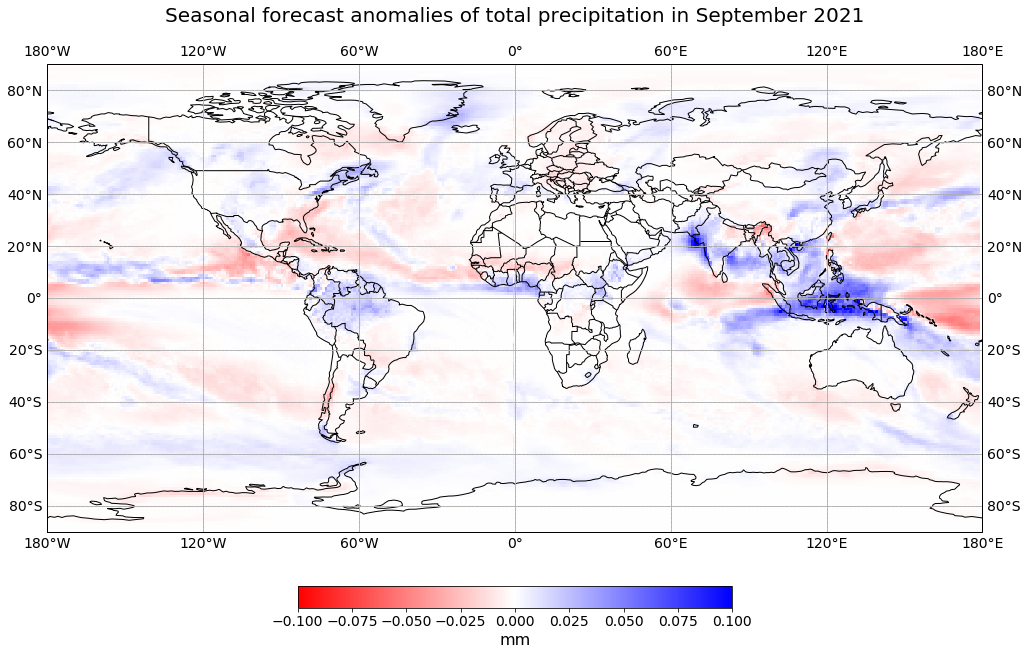

In [55]:
visualize_pcolormesh(data_array = seas5_anomalies_202109_tp[0,:,:], 
                     longitude = seas5_anomalies_202109_tp.longitude, 
                     latitude = seas5_anomalies_202109_tp.latitude, 
                     projection = ccrs.PlateCarree(), 
                     color_scale = 'bwr_r', 
                     unit = 'mm', 
                     long_name = 'Seasonal forecast anomalies of total precipitation in September 2021\n', 
                     vmin= -0.1,
                     vmax = 0.1, 
                     set_global=True)

<br>

In [57]:
anomalies_precomputed = xr.open_dataset('./data/ecmwf_seas5_anomalies_2021_09_tp.grib', engine='cfgrib', backend_kwargs=dict(time_dims=('forecastMonth', 'time')))
anomalies_precomputed

<xarray.Dataset>
Dimensions:        (forecastMonth: 6, latitude: 181, longitude: 360)
Coordinates:
    number         int64 ...
  * forecastMonth  (forecastMonth) int64 1 2 3 4 5 6
    time           datetime64[ns] ...
    surface        float64 ...
  * latitude       (latitude) float64 90.0 89.0 88.0 87.0 ... -88.0 -89.0 -90.0
  * longitude      (longitude) float64 0.0 1.0 2.0 3.0 ... 357.0 358.0 359.0
Data variables:
    tpara          (forecastMonth, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2021-10-12T17:09 GRIB to CDM+CF via cfgrib-0.9.9...

In [61]:
anomalies_precomputed = anomalies_precomputed.assign_coords(longitude=(((anomalies_precomputed.longitude + 180) % 360) - 180))
anomalies_precomputed

<xarray.Dataset>
Dimensions:        (forecastMonth: 6, latitude: 181, longitude: 360)
Coordinates:
    number         int64 0
  * forecastMonth  (forecastMonth) int64 1 2 3 4 5 6
    time           datetime64[ns] 2021-09-01
    surface        float64 0.0
  * latitude       (latitude) float64 90.0 89.0 88.0 87.0 ... -88.0 -89.0 -90.0
  * longitude      (longitude) float64 0.0 1.0 2.0 3.0 ... -4.0 -3.0 -2.0 -1.0
Data variables:
    tpara          (forecastMonth, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2021-10-12T17:09 GRIB to CDM+CF via cfgrib-0.9.9...

In [60]:
visualize_pcolormesh(data_array = anomalies_precomputed[0,:,:], 
                     longitude = anomalies_precomputed.longitude, 
                     latitude = anomalies_precomputed.latitude, 
                     projection = ccrs.PlateCarree(), 
                     color_scale = 'bwr_r', 
                     unit = 'mm', 
                     long_name = 'Seasonal forecast anomalies of total precipitation in September 2021\n', 
                     vmin= -0.1,
                     vmax = 0.1, 
                     set_global=True)

KeyError: 0

In [26]:
hindcast_climate_mean = xr.open_dataset('./data/ecmwf_seas5_hincast_climate_mean_tp.grib', engine='cfgrib', backend_kwargs=dict(time_dims=('forecastMonth', 'time')))
print(hindcast_climate_mean.time)
test = hindcast_climate_mean['tprate']
test

<xarray.DataArray 'time' ()>
array('2021-09-01T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    number   int64 ...
    time     datetime64[ns] 2021-09-01
    surface  float64 ...
Attributes:
    long_name:      initial time of forecast
    standard_name:  forecast_reference_time


<xarray.DataArray 'tprate' (forecastMonth: 6, latitude: 181, longitude: 360)>
[390960 values with dtype=float32]
Coordinates:
    number         int64 ...
  * forecastMonth  (forecastMonth) int64 1 2 3 4 5 6
    time           datetime64[ns] 2021-09-01
    surface        float64 ...
  * latitude       (latitude) float64 90.0 89.0 88.0 87.0 ... -88.0 -89.0 -90.0
  * longitude      (longitude) float64 0.0 1.0 2.0 3.0 ... 357.0 358.0 359.0
Attributes: (12/30)
    GRIB_paramId:                             172228
    GRIB_dataType:                            hcmean
    GRIB_numberOfPoints:                      65160
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_shortName:                           tprate
    GRIB_totalNumber:                         0
    GRIB_units:                               m s**-1
    long_name:                                Total precipitation
    units:                                    m s**-1
    standard_name:                            unknown

<hr>

<p><img src='./img/copernicus_logo.png' align='right' alt='Logo EU Copernicus' width='20%'></img></p>
<br><br><br><br><br>
<span style='float:right'><p style=\"text-align:right;\">This project is licensed under <a href="./LICENSE">APACHE License 2.0</a>. | <a href=\"https://github.com/ecmwf-projects/copernicus-training">View on GitHub</a></span>